# Daten visualisieren

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)


In [20]:
path = "data/"

source_train = os.path.join(path + os.sep, "train.csv")
train = pd.read_csv(source_train)
source_test = os.path.join(path + os.sep, "test.csv")
test = pd.read_csv(source_test)
# Hard copy of the data
df = train.copy()

In [28]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Neue Spalten; Sex umwandeln in 0, 1, etc

In [4]:
# Leider nicht das Optimum, aber hoffentlich besser als vorher!
df["Tot_Fam_Members"] = df["SibSp"] + df["Parch"] + 1    # calculating the total number of relatives in one family
df["Price_Person"] = df["Fare"] / df["Tot_Fam_Members"]
df = df.drop("PassengerId", axis=1) 
# Info aus SibSp und Parch sind verarbeitet
#df = df.drop("SibSp", axis=1) 
#df = df.drop("Parch", axis=1) 

df["Sex"].replace({"male": 1, "female": 0}, inplace=True)
df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace=True)

In [5]:
df_num = df.drop("Cabin", axis=1)
df_num = df_num.drop("Ticket", axis=1)
df_num = df_num.drop("Name", axis=1)
df_num = df_num.dropna(subset=["Embarked"])

In [6]:
df_num.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tot_Fam_Members,Price_Person
0,0,3,1,22.0,1,0,7.2500,0.0,2,3.62500
1,1,1,0,38.0,1,0,71.2833,1.0,2,35.64165
2,1,3,0,26.0,0,0,7.9250,0.0,1,7.92500
3,1,1,0,35.0,1,0,53.1000,0.0,2,26.55000
4,0,3,1,35.0,0,0,8.0500,0.0,1,8.05000


# Histogramm survived ja/nein

In [7]:
#sns.pairplot(df, hue = "Survived") 


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

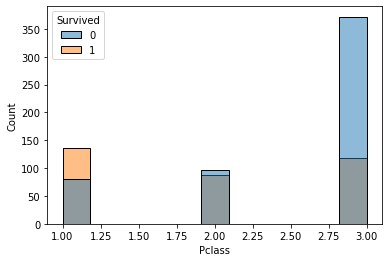

In [8]:
sns.histplot(data=df, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

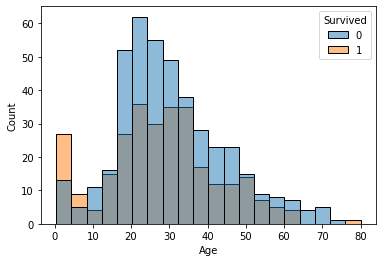

In [9]:
sns.histplot(data=df, x="Age", hue="Survived")

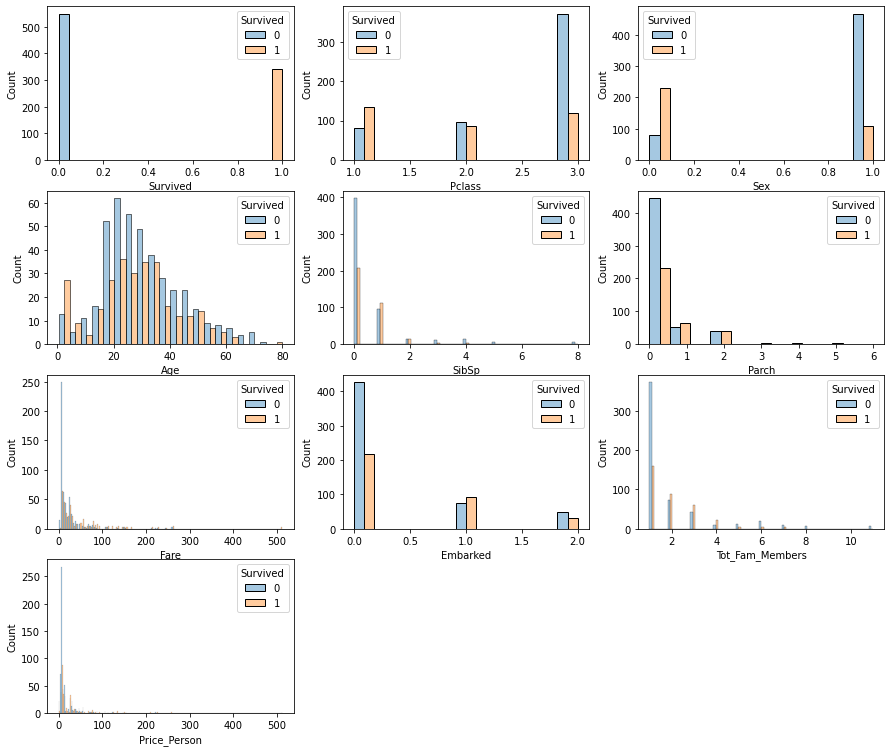

In [10]:
plt.figure(figsize=(15,13))
for i, column in enumerate(df_num.columns):
    plt.subplot(len(df_num.columns)//3+1, 3, i + 1)
    sns.histplot(x=column, hue="Survived", alpha=0.4, data=df_num, multiple="dodge")
# sns.despine()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

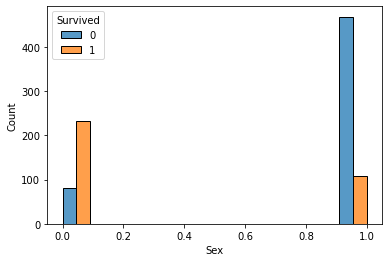

In [11]:
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge")

<AxesSubplot:>

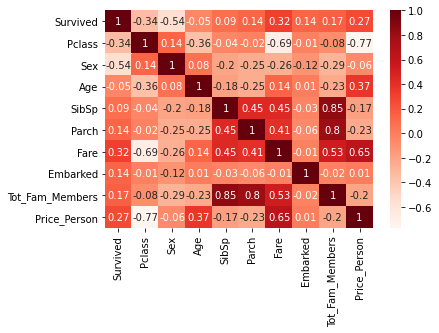

In [12]:
sns.heatmap(df.corr(method="spearman").round(2), annot = True, cmap= "Reds")

# Geschlecht versus Klasse

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

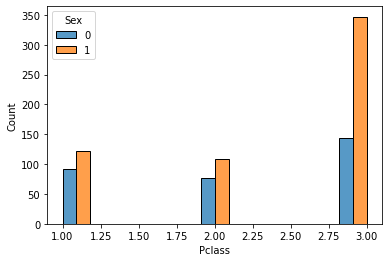

In [13]:
sns.histplot(x="Pclass", hue="Sex", data=df_num, multiple="dodge")

# Scatter-Plot Beziehung Pclass, Age, Sex und Survived

C:\Users\Alfa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


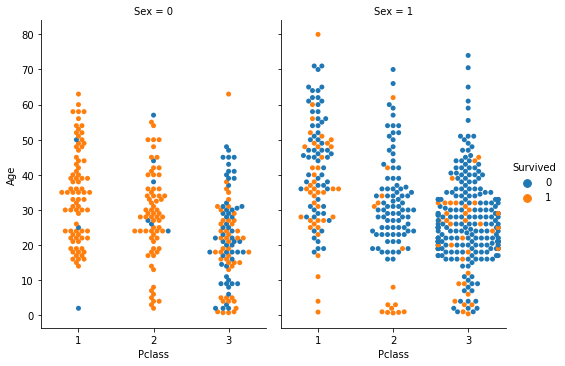

In [14]:
sns.catplot(x="Pclass", y="Age", col="Sex", hue="Survived", aspect=.7, kind="swarm", data=df_num)

In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
